# PREPROCESSING

The question is

Do the following on titanic dataset.

1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [1]:
#importing the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset into python environment

In [3]:
data= pd.read_csv('titanic_dataset.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [5]:
data= pd.read_csv('titanic_dataset.csv',index_col='PassengerId')

In [6]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
data.shape

(891, 11)

In [10]:
#Checking null values

In [11]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

There are null values present in the dataset in three columns namely 'Age', 'Cabin' and 'Embarked'.

In [14]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The dataset, titled, "titanic_dataset", consists of 891 rows and 11 columns namely 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare','Cabin' and 'Embarked' with index column as 'PassengerId'.

# 4. Fill in all the missing values present in all the columns in the dataset

In [16]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

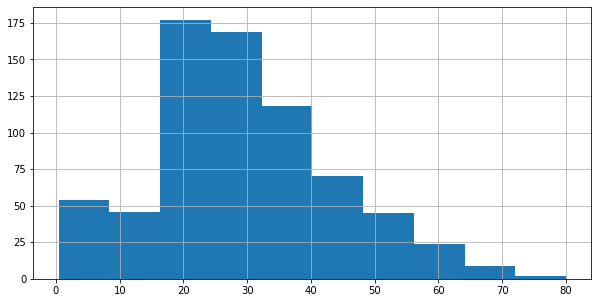

In [17]:
freqgraph=data.Age
freqgraph.hist(figsize=(10,5))
plt.show()

In [18]:
for i in ['Age']:
    data[i] = data[i].fillna(data[i].median())

In [19]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [20]:
data.drop('Cabin',axis=1,inplace=True)
data.dropna(inplace=True)

In [21]:
data.Embarked = data.Embarked.fillna('NA')

In [22]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Now, all the missing values present in all the columns in the dataset are filled in.

# 5. Check and handle outliers in at least 3 columns in the dataset

# (i). Age column

Text(0.5, 1.0, 'Box plot of Age')

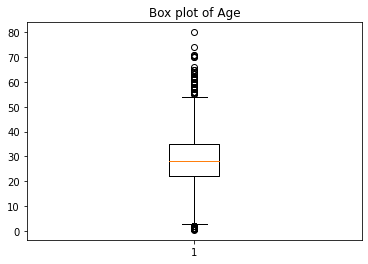

In [23]:
plt.boxplot(data['Age'])
plt.title("Box plot of Age")

In [24]:
Q1 = np.percentile(data['Age'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Age'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
Up_lim=Q3+1.5*IQR

In [25]:
outlier = []
for x in data['Age']:
    if((x>Up_lim) or (x<low_lim)):
        outlier.append(x)

In [26]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 0.83,
 74.0,
 56.0]

In [27]:
ind1=data['Age']>Up_lim
data.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            852, 880],
           dtype='int64', name='PassengerId')

In [28]:
data.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            852, 880],inplace=True)

Text(0.5, 1.0, 'Box plot of Age')

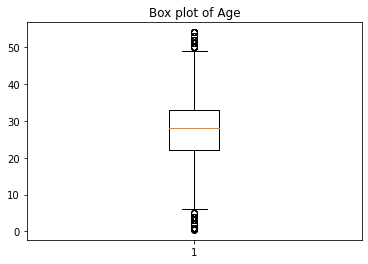

In [29]:
plt.boxplot(data['Age'])
plt.title("Box plot of Age")

# (ii). SibSp column

Text(0.5, 1.0, 'Box plot of SibSp')

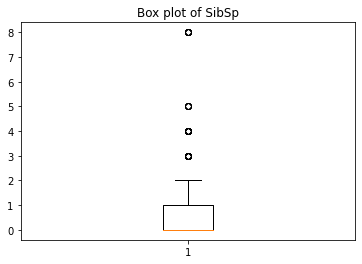

In [30]:
plt.boxplot(data['SibSp'])
plt.title("Box plot of SibSp")

In [31]:
Q1 = np.percentile(data['SibSp'], 25, interpolation='midpoint')
Q2 = np.percentile(data['SibSp'], 50, interpolation='midpoint')
Q3 = np.percentile(data['SibSp'], 75, interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
Up_lim=Q3+1.5*IQR

In [32]:
outlier = []
for x in data['SibSp']:
    if((x>Up_lim) or (x<low_lim)):
        outlier.append(x)

In [33]:
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [34]:
ind1=data['SibSp']>Up_lim
data.loc[ind1].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [35]:
data.drop([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],inplace= True)

Text(0.5, 1.0, 'Box plot of SibSp')

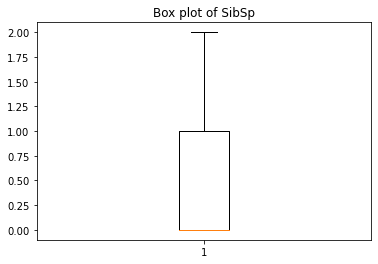

In [36]:
plt.boxplot(data['SibSp'])
plt.title("Box plot of SibSp")

# (iii). Fare column

Text(0.5, 1.0, 'Box plot of Fare')

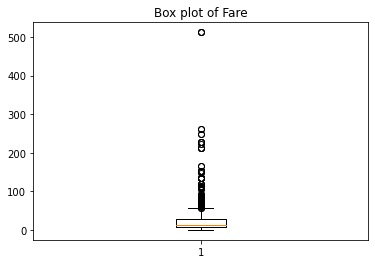

In [37]:
plt.boxplot(data['Fare'])
plt.title("Box plot of Fare")

In [38]:
Q1 = np.percentile(data['Fare'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Fare'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Fare'], 75, interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
Up_lim=Q3+1.5*IQR

In [39]:
outlier = []
for x in data['Fare']:
    if((x>Up_lim) or (x<low_lim)):
        outlier.append(x)

In [40]:
outlier

[71.2833,
 146.5208,
 82.1708,
 76.7292,
 83.475,
 73.5,
 61.175,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 61.3792,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 135.6333,
 57.9792,
 153.4625,
 133.65,
 66.6,
 134.5,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 59.4,
 93.5,
 57.9792,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 120.0,
 93.5,
 83.1583,
 89.1042,
 164.8667]

In [41]:
ind1=data['Fare']>Up_lim
in2=data.loc[ind1].index
data.drop(in2,inplace=True)

Text(0.5, 1.0, 'Box plot of Fare')

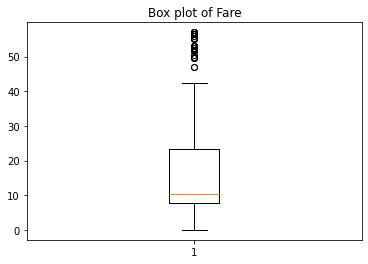

In [42]:
plt.boxplot(data['Fare'])
plt.title("Box plot of Fare")

Outliers in three columns namely 'Age', 'SibSp' and 'Fare' are handled.

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [43]:
#Converting categorical data

Replacing categorical features with dummy variables in pandas. Otherwise Machine learning algorithm will not be able to directly take in those features as inputs.

In [45]:
pd.get_dummies(data['Embarked'],drop_first=True).head()

,Q,S
PassengerId,,
1,0,1
3,0,1
4,0,1
5,0,1
6,1,0


In [46]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)
data.drop(['Sex','Embarked','Name','Ticket'],axis =1,inplace=True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
6,0,3,28.0,0,0,8.4583


In [47]:
data=pd.concat([data,sex,embark],axis=1)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1
6,0,3,28.0,0,0,8.4583,1,1,0


In [48]:
#One hot encoding

<AxesSubplot:>

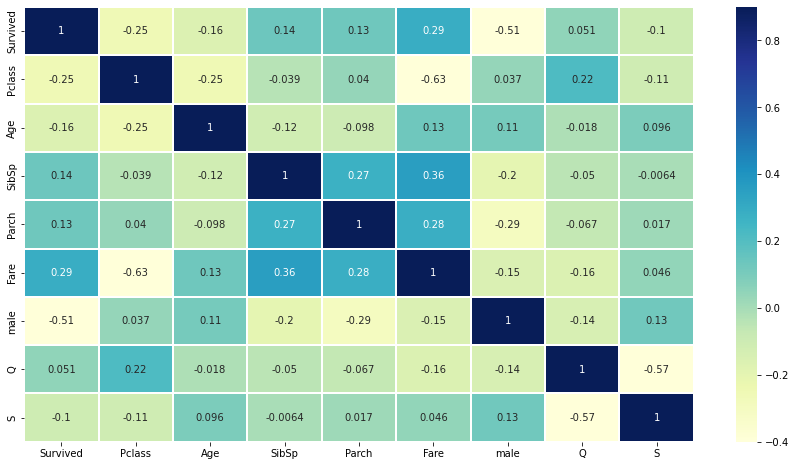

In [49]:
corrmatrix = data.corr()
plt.subplots(figsize=(15,8))
sns.heatmap(corrmatrix, vmin=-0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='YlGnBu')

In [50]:
y = data['Survived']
X = data.drop('Survived', axis=1)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [52]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

MSE is: 0.14213566147697954


In [54]:
from sklearn.metrics import r2_score
print('R squared value is:',r2_score(y_test,predictions))

R squared value is: 0.3912021492681822


In [55]:
#Minmax scaling

In [56]:
from sklearn import preprocessing
X=data.drop('Survived',axis=1)
X.describe()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,2.505007,28.023247,0.283262,0.288984,16.407015,0.686695,0.097282,0.752504
std,0.710878,10.150850,0.513310,0.764193,12.559295,0.464169,0.296553,0.431867
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.877100,0.000000,0.000000,1.000000
50%,3.000000,28.000000,0.000000,0.000000,10.500000,1.000000,0.000000,1.000000
75%,3.000000,32.750000,1.000000,0.000000,23.250000,1.000000,0.000000,1.000000
max,3.000000,54.000000,2.000000,6.000000,57.000000,1.000000,1.000000,1.000000


In [57]:
min_max= preprocessing.MinMaxScaler(feature_range=(0,1))

In [58]:
X=min_max.fit_transform(X)

In [59]:
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,0.752504,0.515178,0.141631,0.048164,0.287842,0.686695,0.097282,0.752504
std,0.355439,0.189452,0.256655,0.127365,0.220339,0.464169,0.296553,0.431867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.402762,0.000000,0.000000,0.138195,0.000000,0.000000,1.000000
50%,1.000000,0.514744,0.000000,0.000000,0.184211,1.000000,0.000000,1.000000
75%,1.000000,0.603397,0.500000,0.000000,0.407895,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
X.head()

,0,1,2,3,4,5,6,7
0,1.0,0.402762,0.5,0.0,0.127193,1.0,0.0,1.0
1,1.0,0.477417,0.0,0.0,0.139035,0.0,0.0,1.0
2,0.0,0.645390,0.5,0.0,0.931579,0.0,0.0,1.0
3,1.0,0.645390,0.0,0.0,0.141228,1.0,0.0,1.0
4,1.0,0.514744,0.0,0.0,0.148391,1.0,1.0,0.0


Here all the entries in the dataframe are in the range (0,1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)
print('MSE is:',mean_squared_error(y_test,predictions))
print('R squared value is:',r2_score(y_test,predictions))

MSE is: 0.14213566147697956
R squared value is: 0.3912021492681821


Hence, Min max scaling doesn't make any change to the dataset.